# Clustering Clientes por Transaccionalidad de Tarjetas de Crédito

Ya sabemos como correr clusters en python usando scikit-learn. Ahora veamos una aplicación práctica.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


In [10]:
#Fuente:  https://www.kaggle.com/arjunbhasin2013/ccdata/downloads/ccdata.zip/1#CC%20GENERAL.csv
cc_data = pd.read_csv('C:/Users/wavm0/OneDrive/Documents/Python/CC GENERAL.csv')

In [11]:
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
print(cc_data.shape)
cc_data.describe()

(8950, 18)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
cc_data = cc_data.drop(cc_data.columns.values.tolist()[0], axis=1)
cc_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
cc_data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
cc_data = cc_data.fillna(cc_data.mean())

cc_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

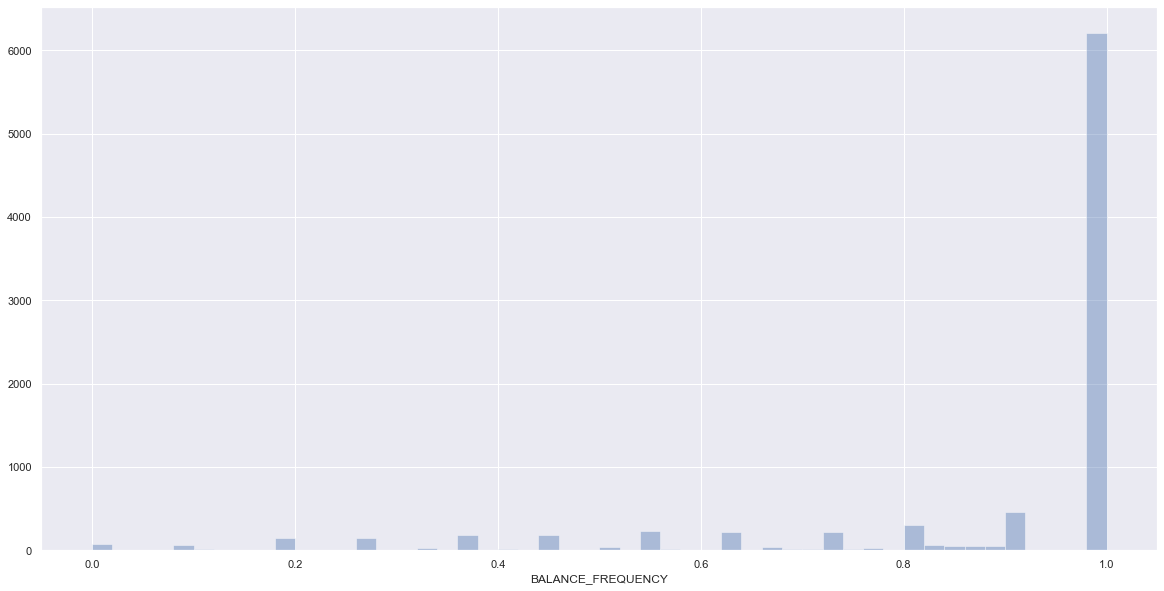

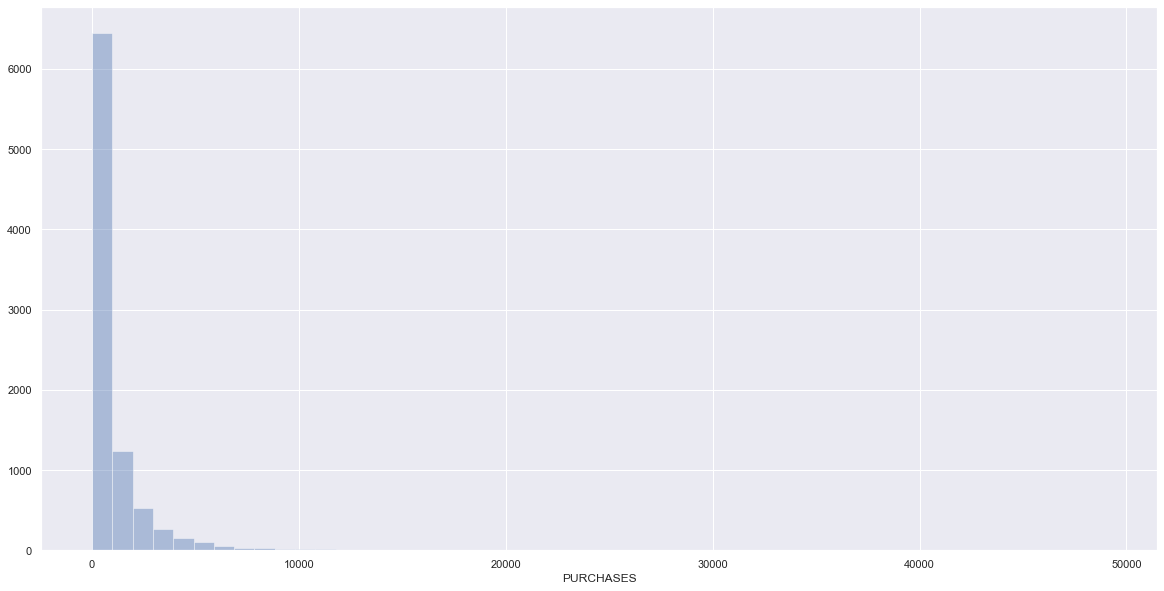

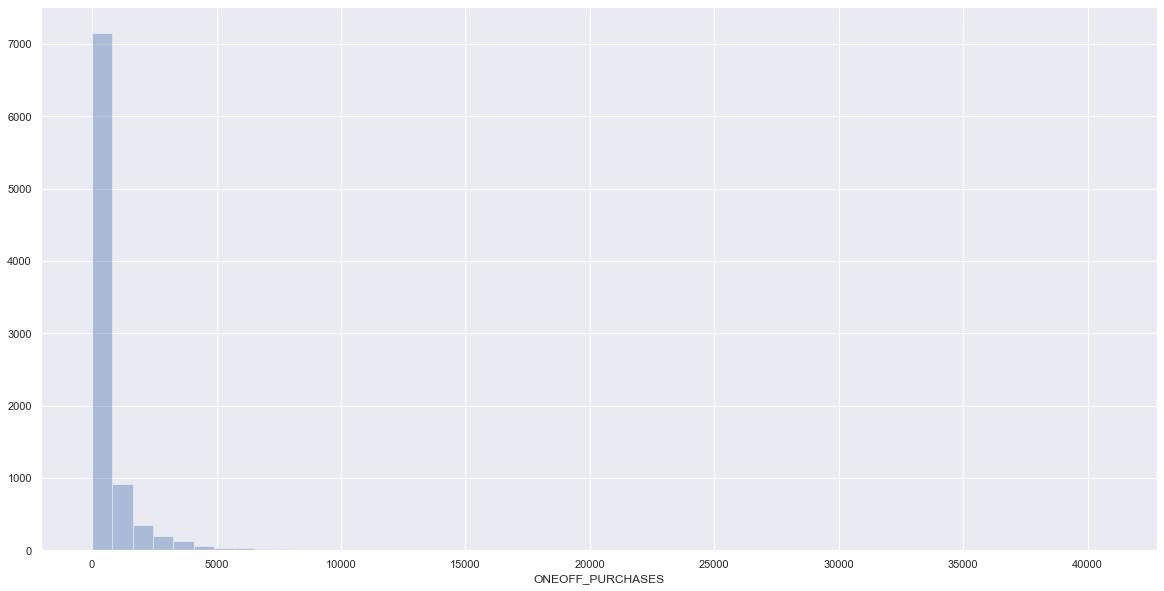

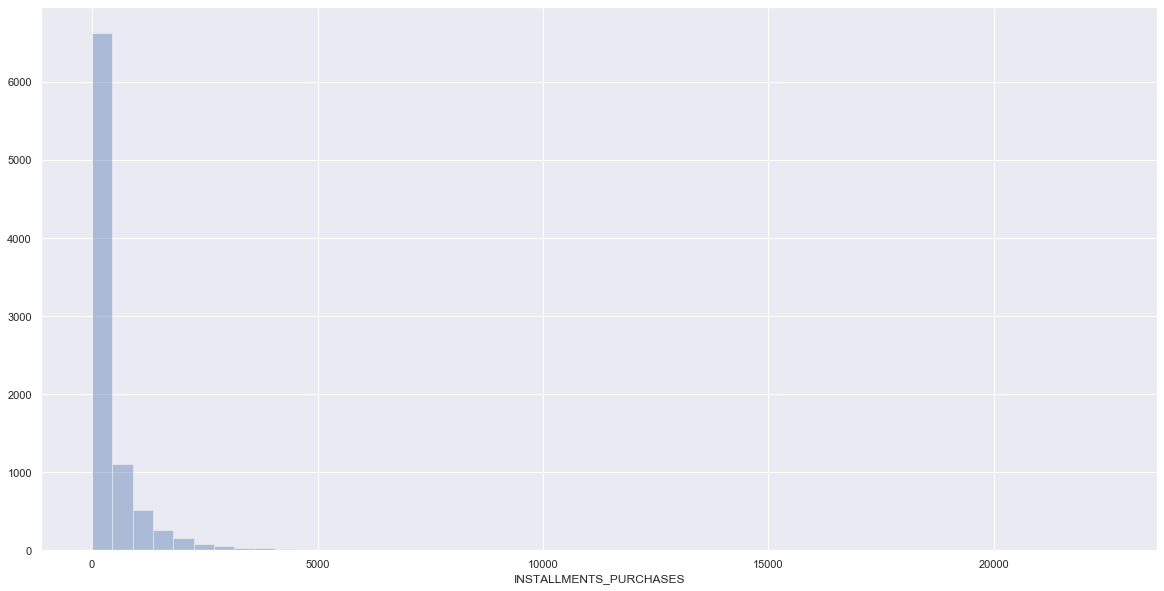

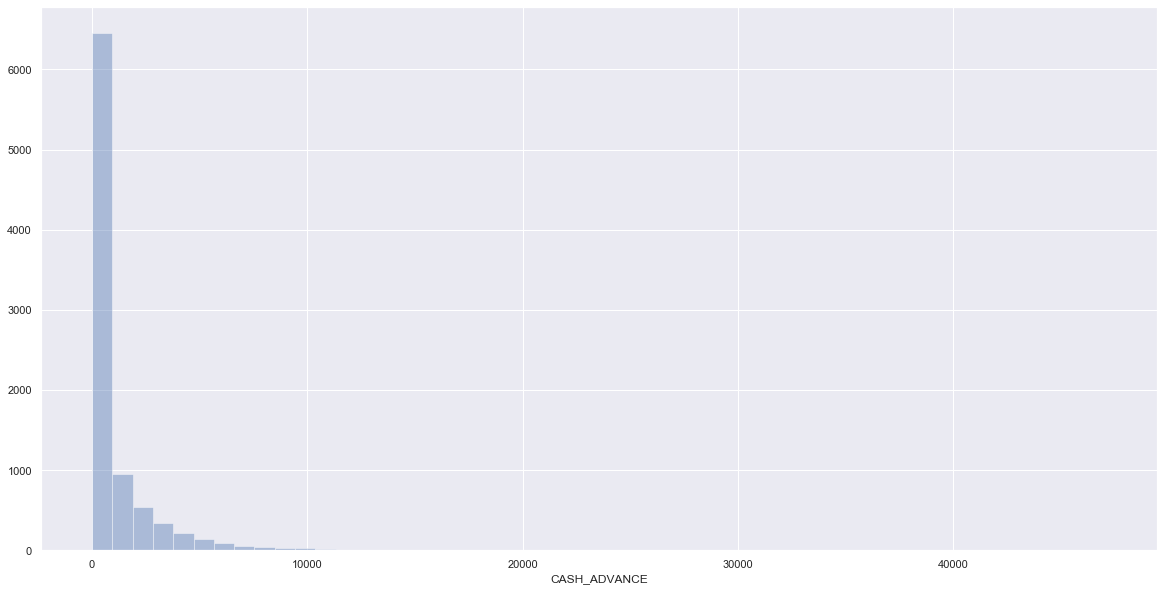

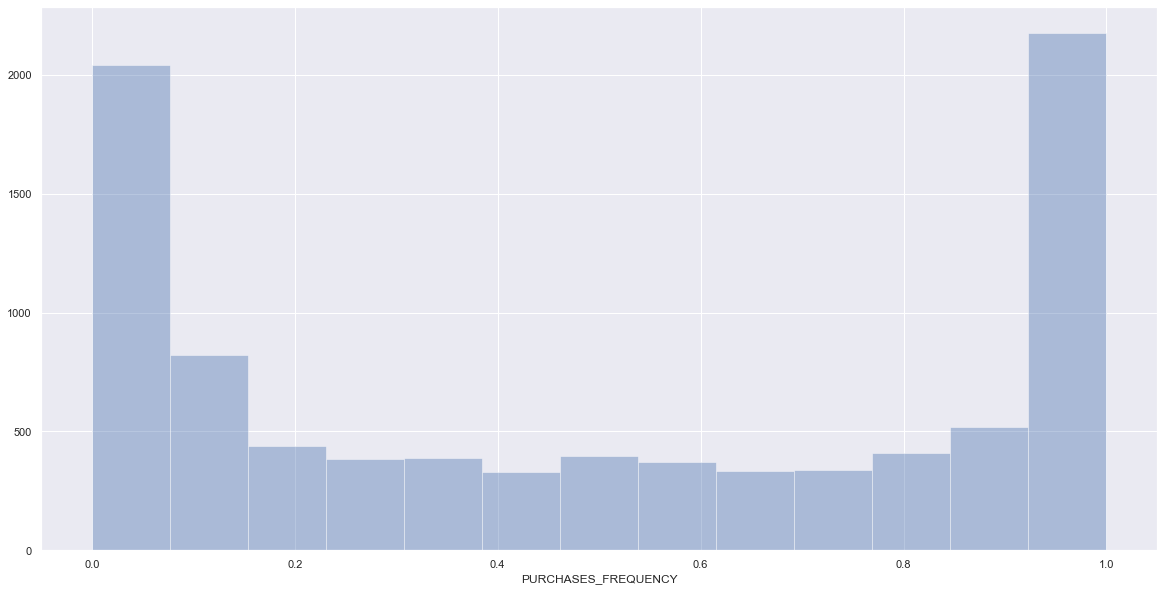

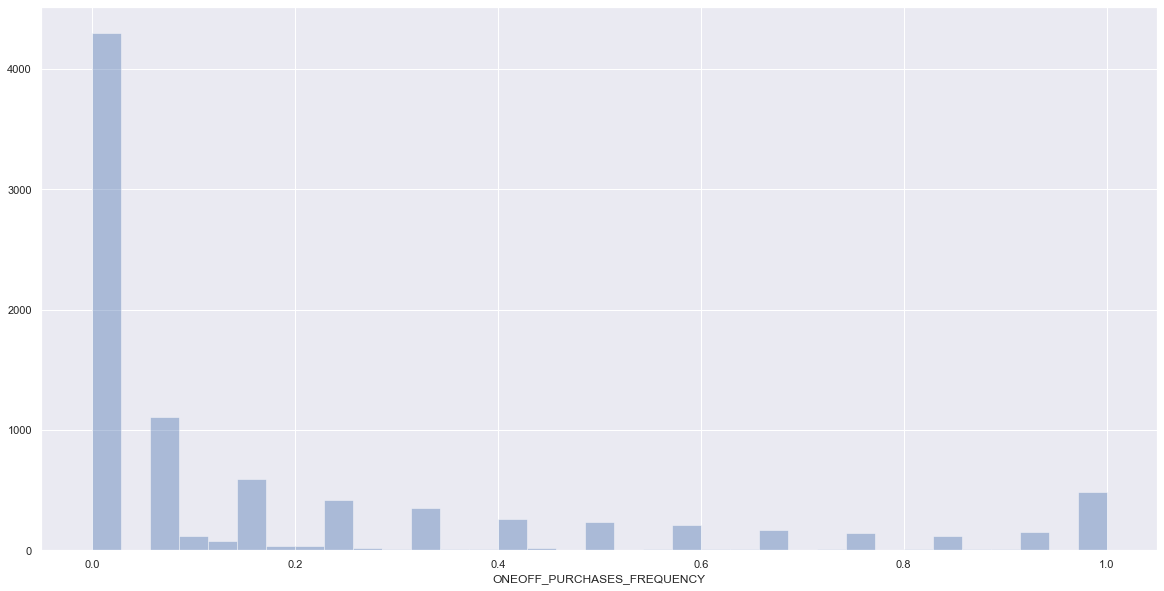

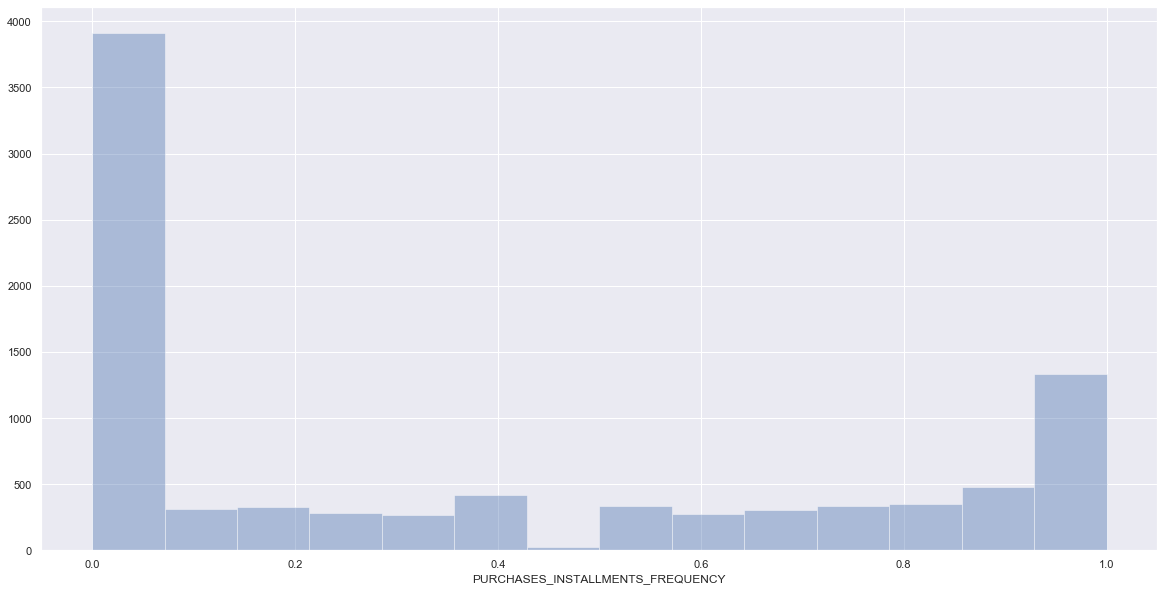

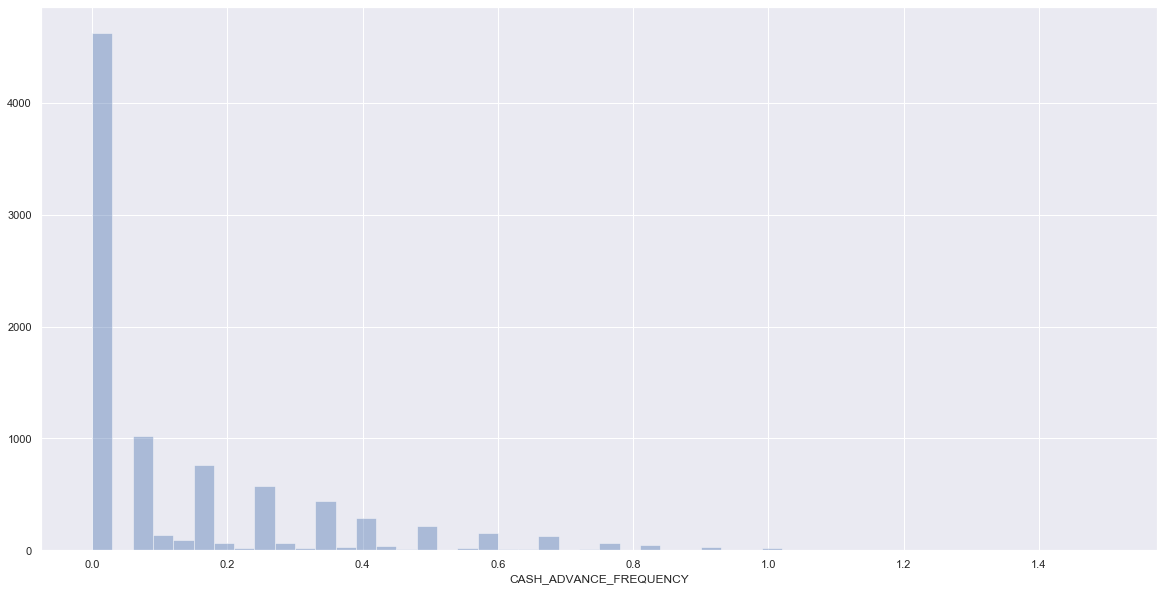

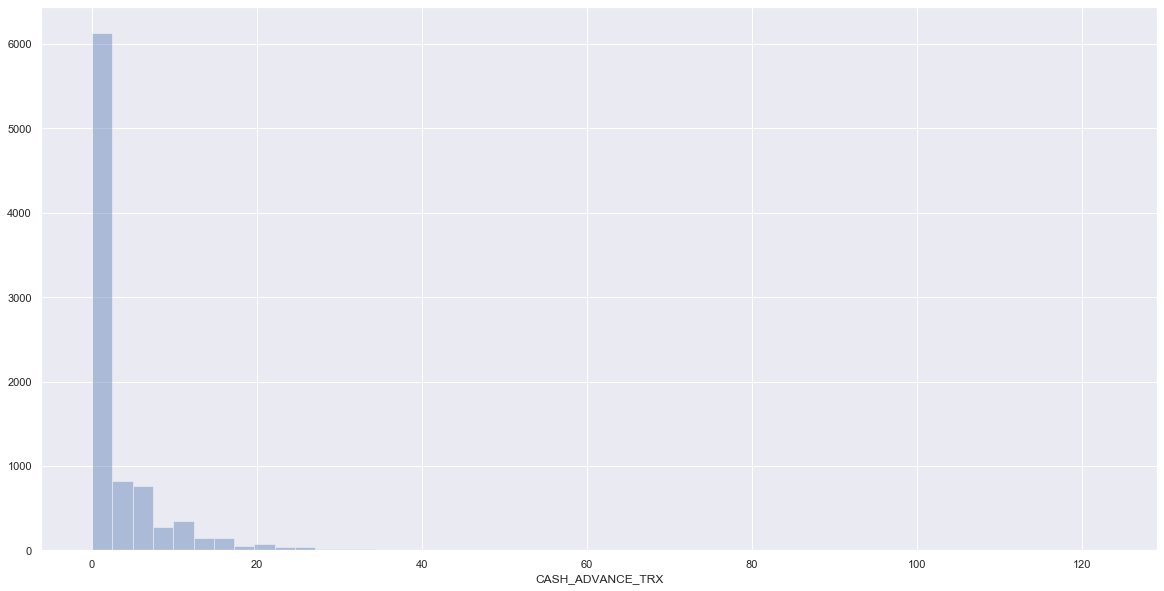

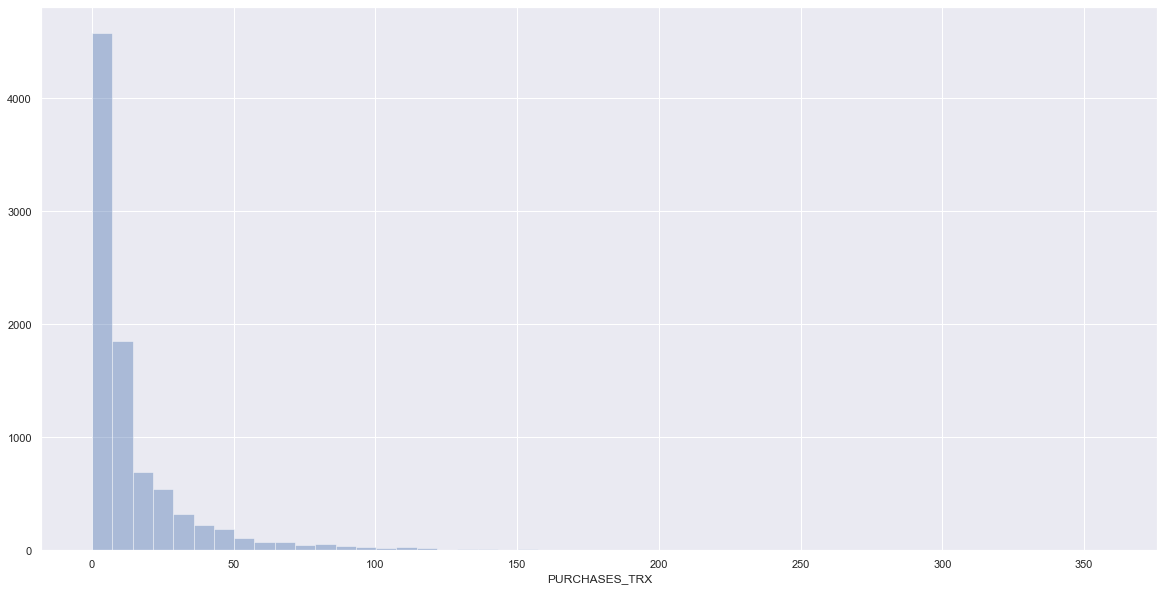

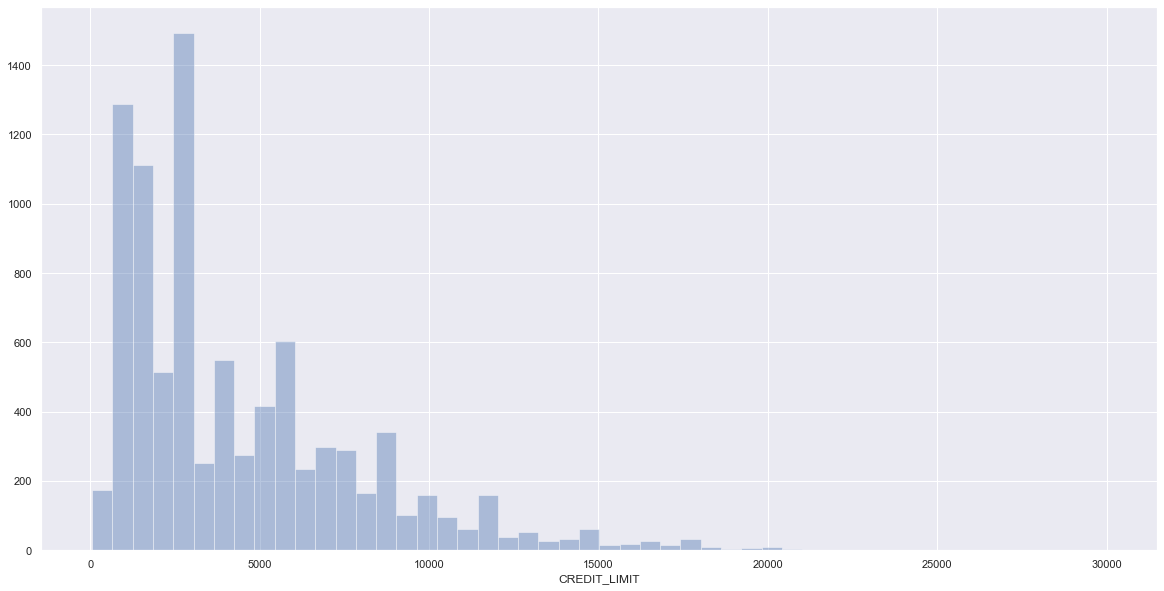

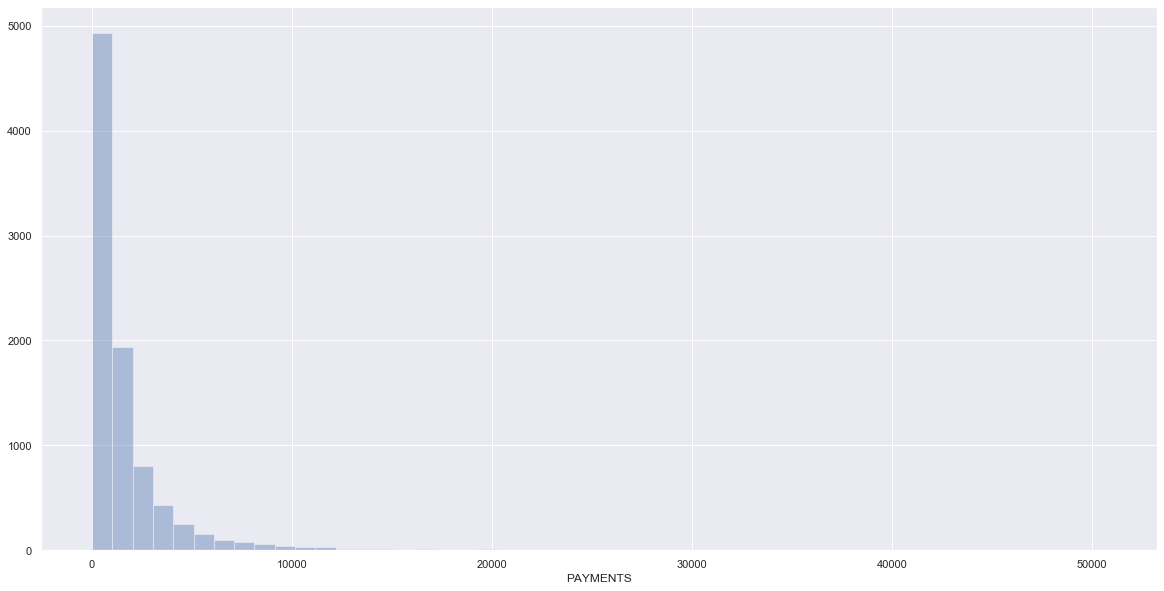

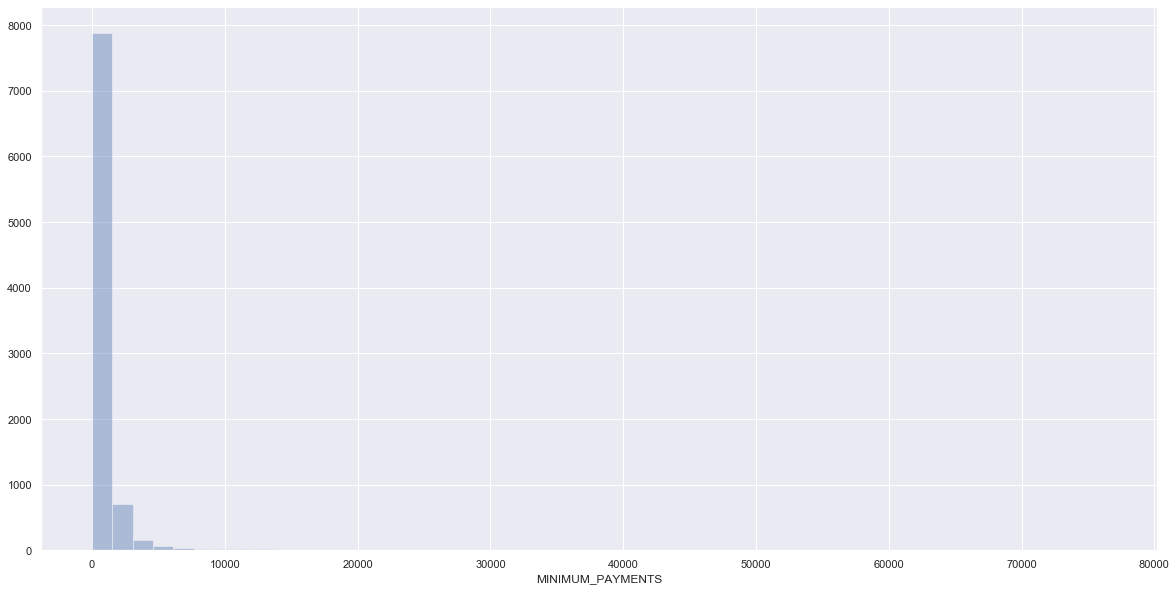

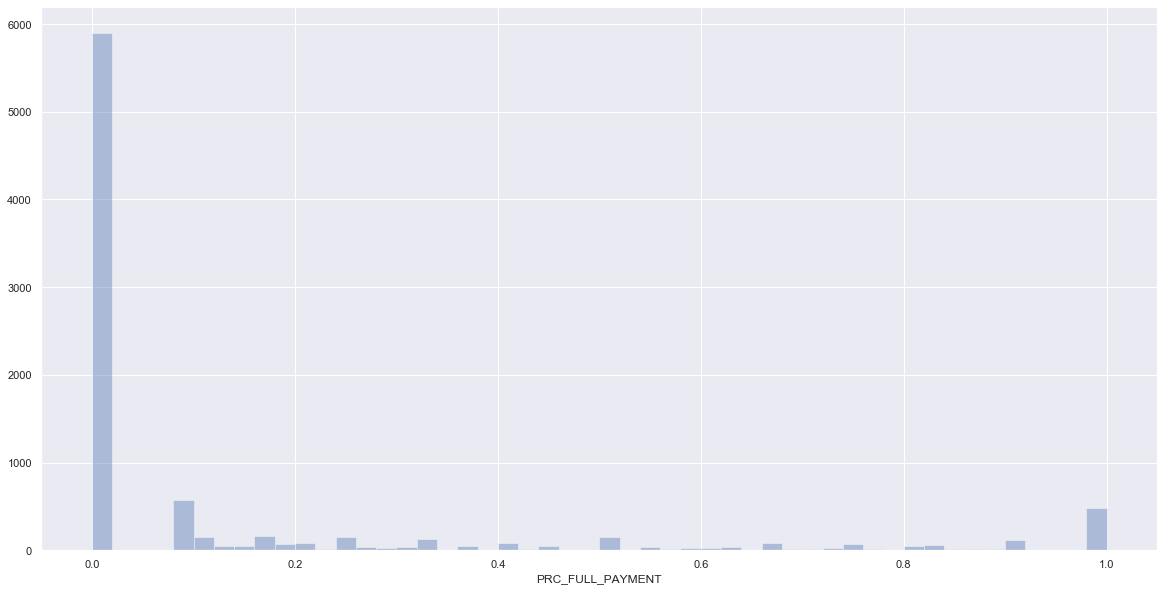

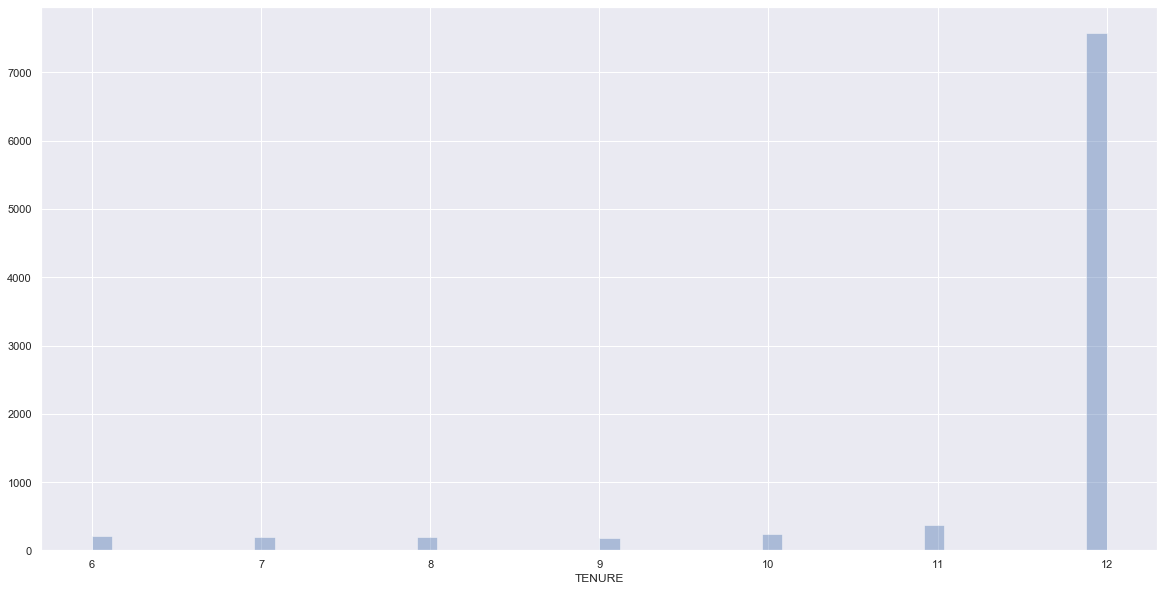

In [16]:
sns.set()
for i in range(1, len(cc_data.columns.values)):
    #plt.subplot(6, 3, i)
    plt.figure(figsize=(20,10))
    sns.distplot(cc_data[cc_data.columns.values[i]], kde=False, hist=True)
    plt.plot()
    

## Transformación de Variables:

Para hacer más facil el entrenamiento de nuestro modelo hacemos rangos para las variables. Los rangos son distintos para tres tipos de variables. El primer tipo es variables continuas con rangos grandes (y con variabildad alta), el segundo es variables de frequencia que varian entre 0 y 1, y por último transformamos variables de conteo que son continuas pero los rangos son más pequeños.  



In [17]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    cc_data[Range]=0        
    cc_data.loc[((cc_data[c]>0)&(cc_data[c]<=500)),Range]=1
    cc_data.loc[((cc_data[c]>500)&(cc_data[c]<=1000)),Range]=2
    cc_data.loc[((cc_data[c]>1000)&(cc_data[c]<=3000)),Range]=3
    cc_data.loc[((cc_data[c]>3000)&(cc_data[c]<=5000)),Range]=4
    cc_data.loc[((cc_data[c]>5000)&(cc_data[c]<=10000)),Range]=5
    cc_data.loc[((cc_data[c]>10000)),Range]=6

In [18]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    cc_data[Range]=0
    cc_data.loc[((cc_data[c]>0)&(cc_data[c]<=0.1)),Range]=1
    cc_data.loc[((cc_data[c]>0.1)&(cc_data[c]<=0.2)),Range]=2
    cc_data.loc[((cc_data[c]>0.2)&(cc_data[c]<=0.3)),Range]=3
    cc_data.loc[((cc_data[c]>0.3)&(cc_data[c]<=0.4)),Range]=4
    cc_data.loc[((cc_data[c]>0.4)&(cc_data[c]<=0.5)),Range]=5
    cc_data.loc[((cc_data[c]>0.5)&(cc_data[c]<=0.6)),Range]=6
    cc_data.loc[((cc_data[c]>0.6)&(cc_data[c]<=0.7)),Range]=7
    cc_data.loc[((cc_data[c]>0.7)&(cc_data[c]<=0.8)),Range]=8
    cc_data.loc[((cc_data[c]>0.8)&(cc_data[c]<=0.9)),Range]=9
    cc_data.loc[((cc_data[c]>0.9)&(cc_data[c]<=1.0)),Range]=10
    

In [19]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    cc_data[Range]=0
    cc_data.loc[((cc_data[c]>0)&(cc_data[c]<=5)),Range]=1
    cc_data.loc[((cc_data[c]>5)&(cc_data[c]<=10)),Range]=2
    cc_data.loc[((cc_data[c]>10)&(cc_data[c]<=15)),Range]=3
    cc_data.loc[((cc_data[c]>15)&(cc_data[c]<=20)),Range]=4
    cc_data.loc[((cc_data[c]>20)&(cc_data[c]<=30)),Range]=5
    cc_data.loc[((cc_data[c]>30)&(cc_data[c]<=50)),Range]=6
    cc_data.loc[((cc_data[c]>50)&(cc_data[c]<=100)),Range]=7
    cc_data.loc[((cc_data[c]>100)),Range]=8

In [20]:
cc_data.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(cc_data)

* En clase omitimos este paso. Pero es extremadamente importante para que los resultados de nuestro clustering sean interpretables. Corrran el código de clusterización y de visualización con y sin normalizar los datos para que noten la diferencia en los resultados.

In [21]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

## Método del Codo para encontrar un número adecuado de clusters

In [22]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i, verbose=0)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

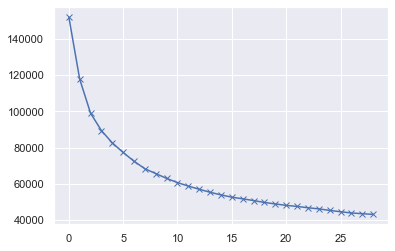

In [23]:
plt.plot(cost, 'bx-')

Elegimos el número de clusters de acuerdo a nuestra aplicación. En este caso menos de 5 clusteres podrían tener demasiado error de segmentación. Por otro lado, elegir demasiados clusters puede que nos motive a tener demasiadas campañas de marketing para cubrir cada uno de los clusters. 

Un número entre 5 y 10 podría ser adecuado. 

## Clustering

Ahora si corremos el algorítmo. Elegimos 6 clusters pero ustedes pueden seleccionar el número que mejor les parezca. 

In [24]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

In [25]:
clusters=pd.concat([cc_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,3
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,4
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,2
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,3
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,3


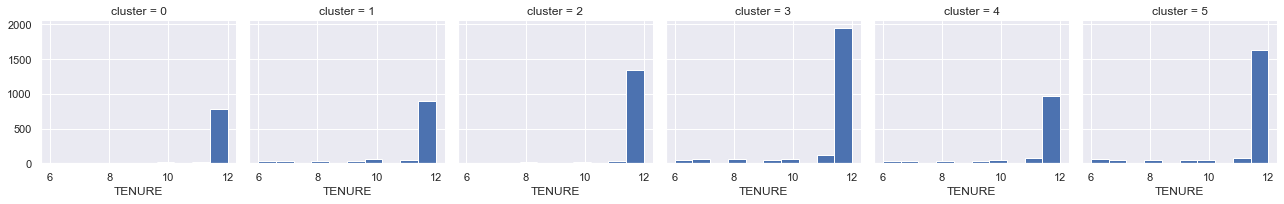

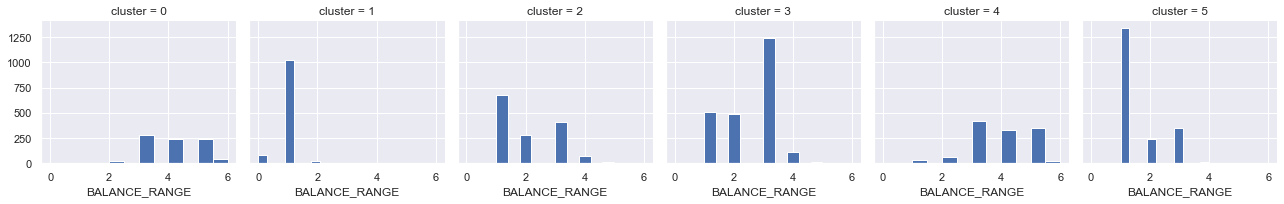

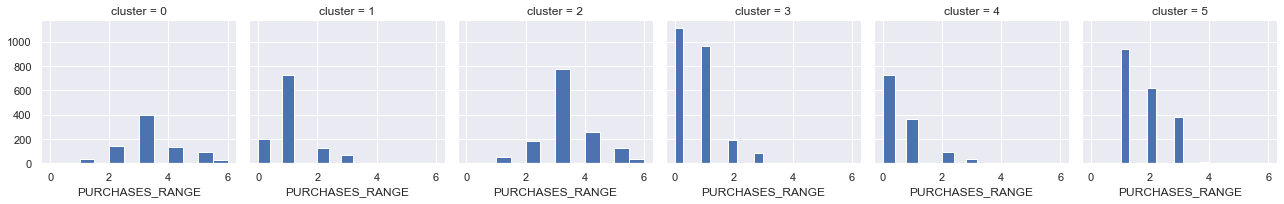

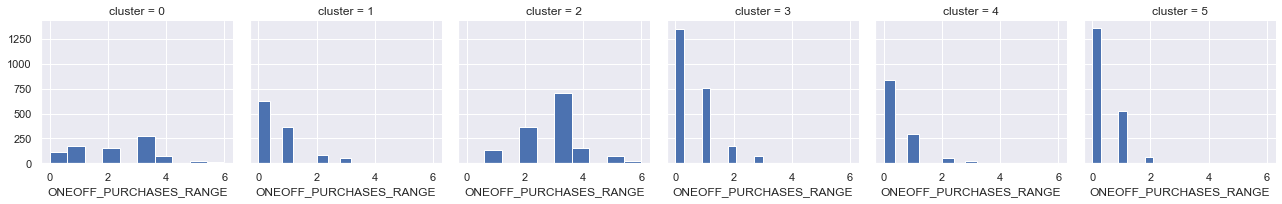

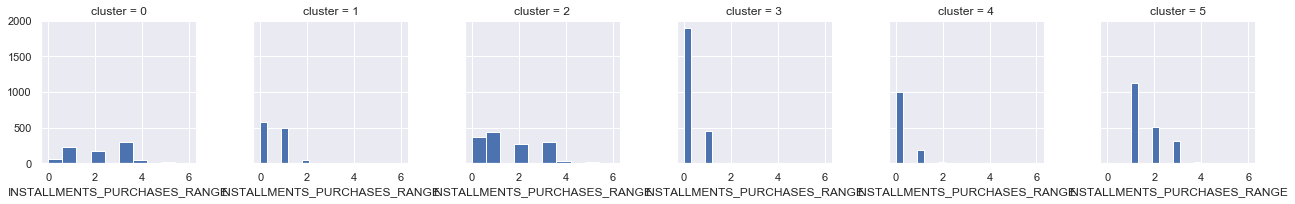

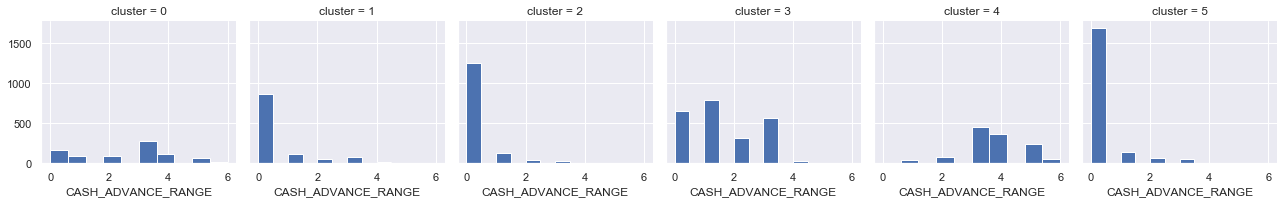

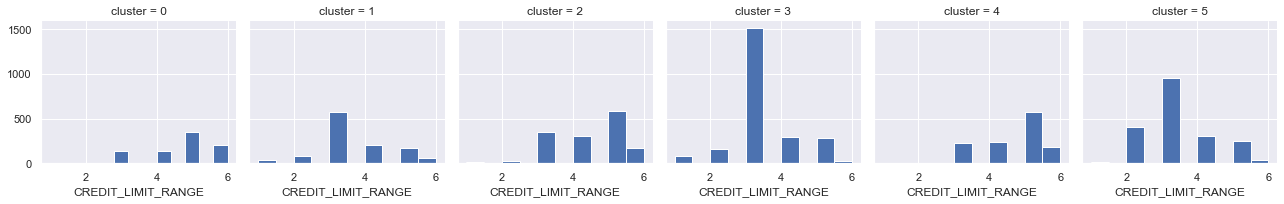

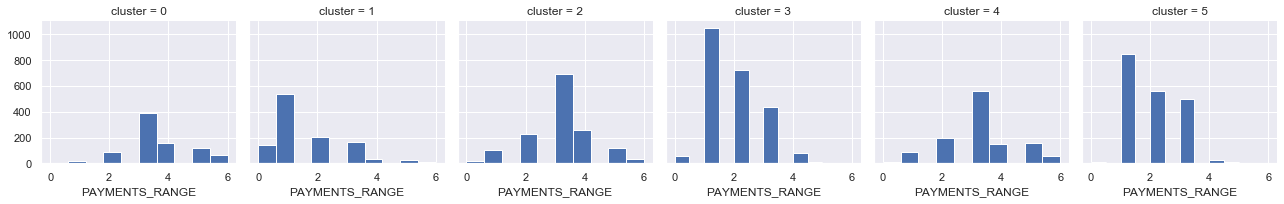

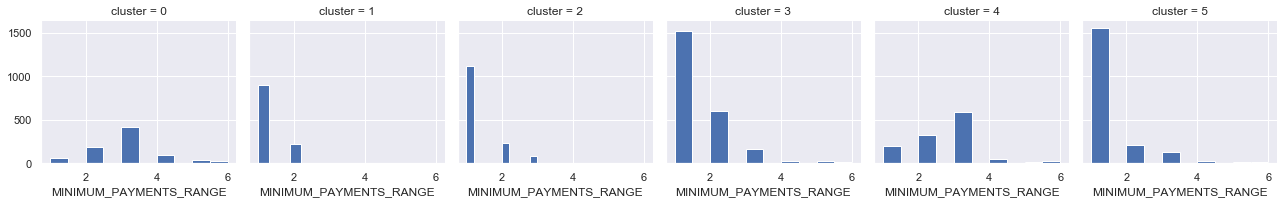

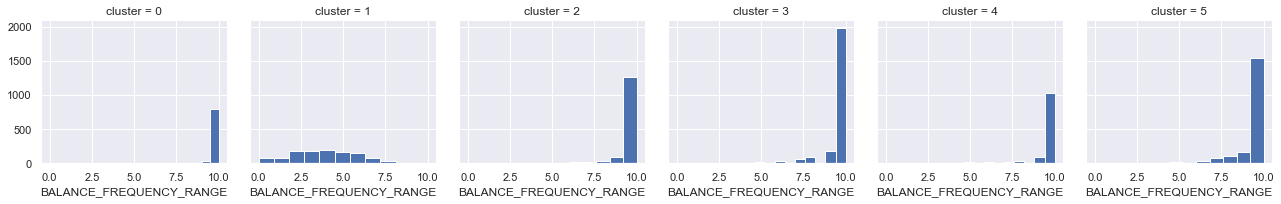

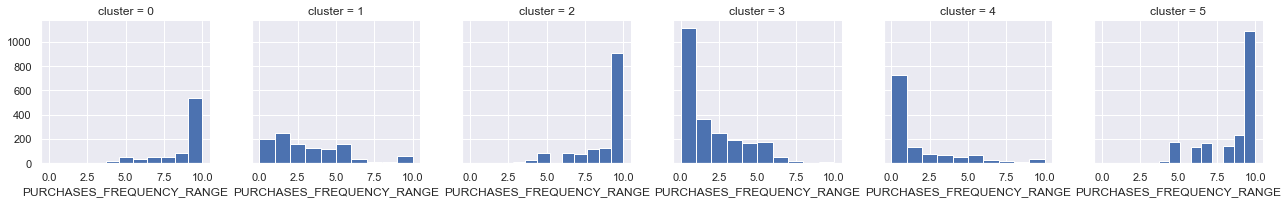

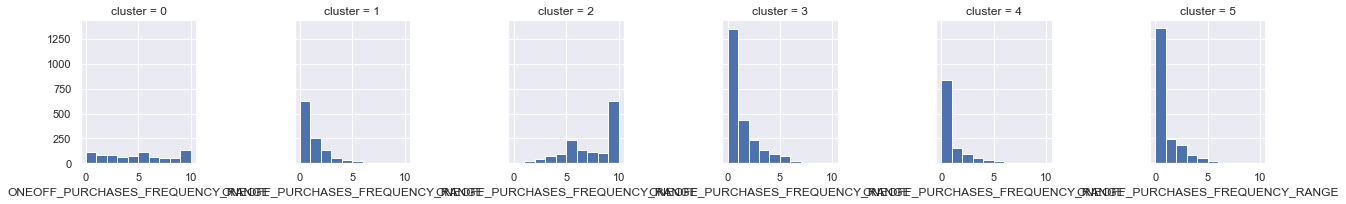

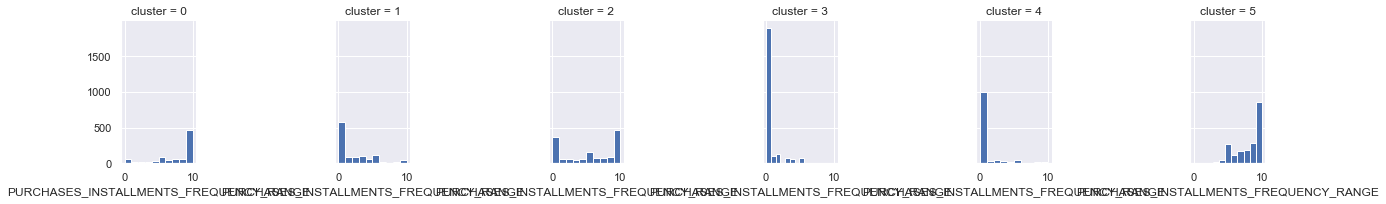

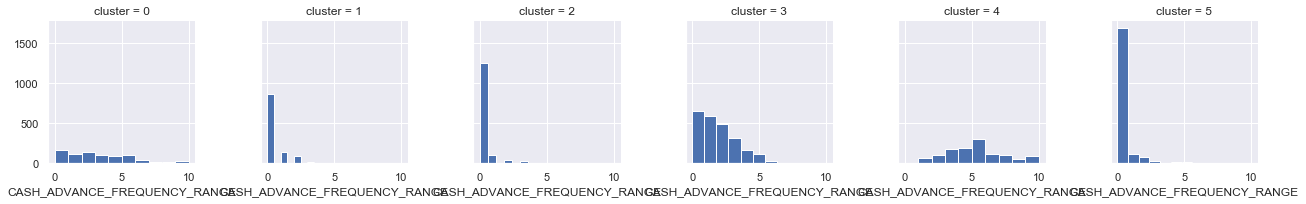

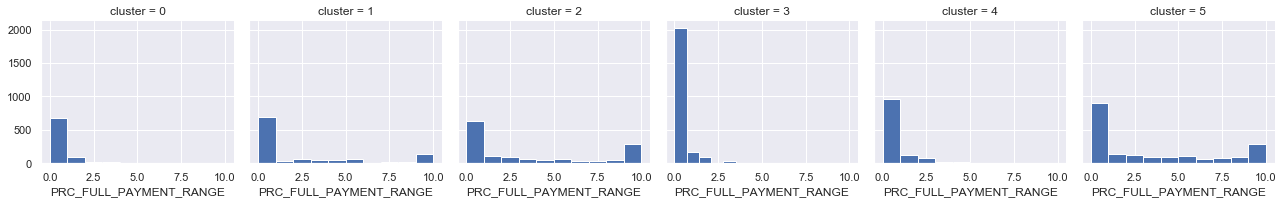

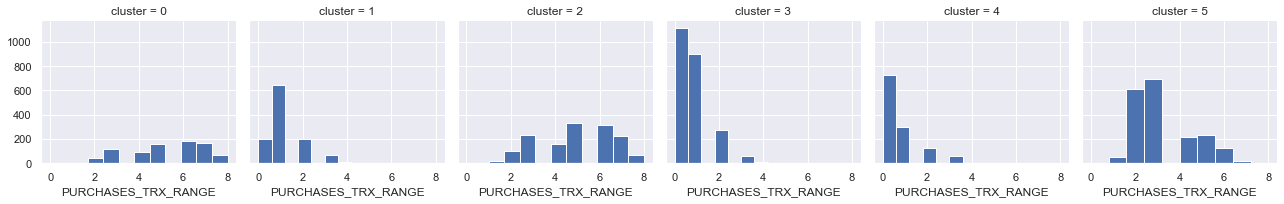

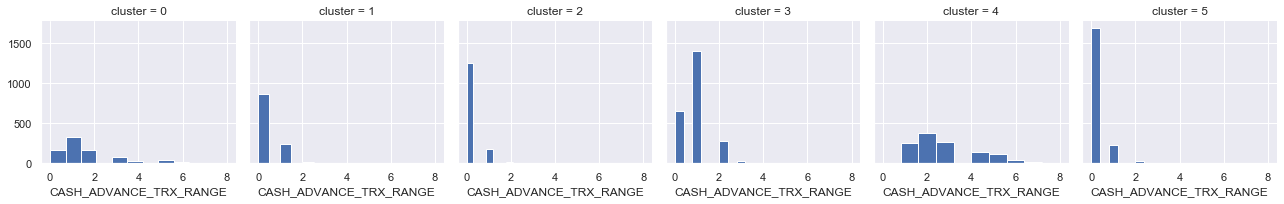

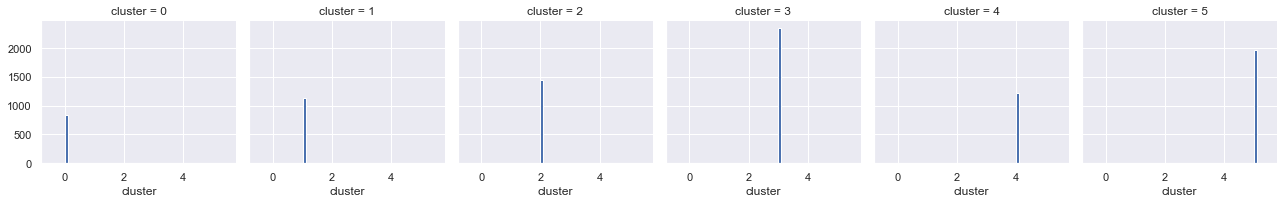

In [26]:
for c in clusters.columns.tolist():
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c, color='b')

## Visualización de datos usando PCA. 

Principal-Component Analysis (PCA) es un método de reducción de dimensionalidad que no hemos cubierto aún en las clases. Sin embargo, pueden estudiar el código y los resultados gráficos para pensar en la campañas que podrían implementar informadas por este dataset y por la clusterización hecha sobre el.

In [27]:
dist = 1 - cosine_similarity(X)

pca = PCA(6)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 6)

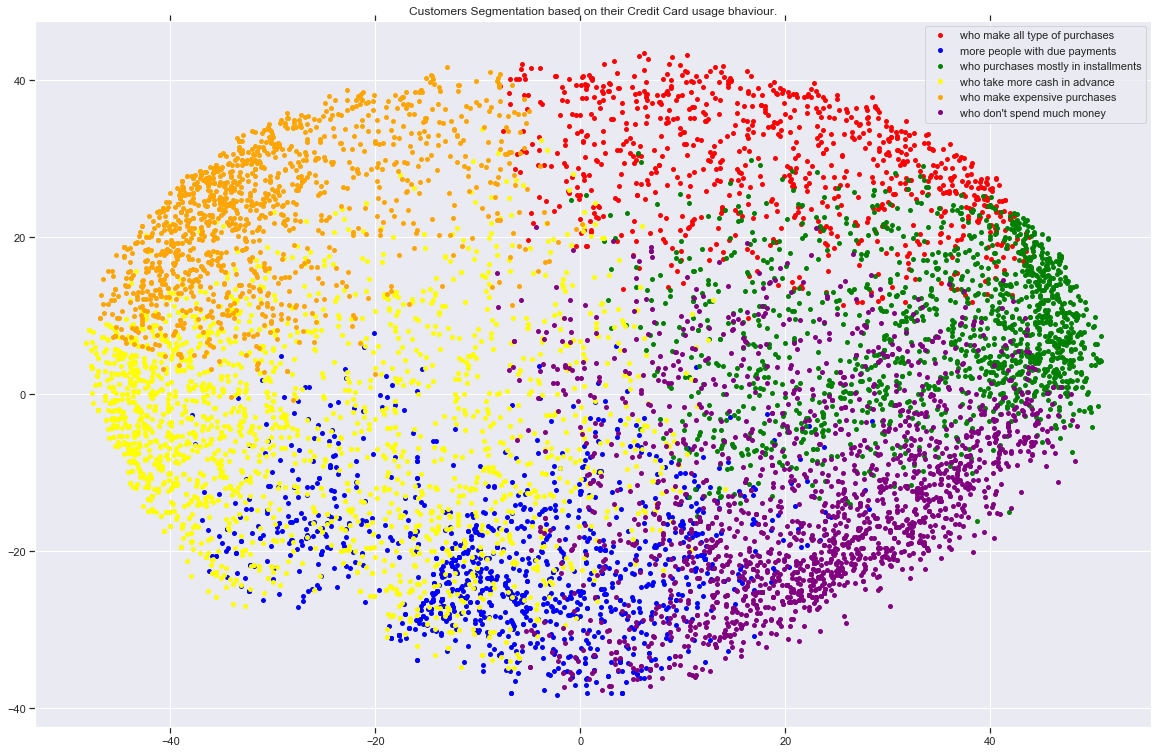

In [28]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()